<a href="https://colab.research.google.com/github/brunomcr/software_engeneer/blob/main/Software_Engenieer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports

In [ ]:
import math
import array

import numpy as np
import matplotlib.pyplot as plt

from time import process_time

---
# Big O Notation

How time scales with respect to some input variables

#### Important Rules of Big O

* Different steps get added
```
n * n = n² == O(n²)
```

* Drop constants
```
n + n = 2n == O(n)
```

* Different inputs => Differents variables
```
a + b == O(a + b)
a * b == O(a * b)
```

* Drop non-dominate terms
```
n * n + n = n² + n == O(n²)
```

#### Order of Growth (smallest to largest)



* O(1) - Constant


In [ ]:
def constant(n):
  cons = 100 * n  # O(1)
  return cons


* O(log n) - Logarithmic


In [ ]:
def logarithmic(n, base):
  return math.log(n, base)  # O(log n)


* O(n) - Linear


In [ ]:
def linear(n):
  total = 0 
  for i in n: # O(n)
    total += i 
  return total 


* O(n log n) - Linearithmic


In [ ]:
def linearithmic(n, base):
  y = n
  while y > 1:
    n = int(n / 2)
    print(f'Log({n}) = {math.log(n, base)}')
    for i in range(y):
      print(i)

* O(n²) - Quadric


In [ ]:
def quadric(n):
  for i in range(n):  # O(n)
    i + 1    
    for j in range(n):  # O(n) 
      j + 1 
      print(i, j)

* O(n³) - Cubic


In [ ]:
def cubic(n):
    for i in range(n):  # O(n)
      i + 1    
      for j in range(n):  # O(n) 
        j + 1
        for k in range(n):  # O(n) 
          k + 1 
          print(i, j, k)

* O(2**n) - Exponential


* O(n!) - Factorial


---
# Data Structure

Is a way to organizing data so that it can be use effectively

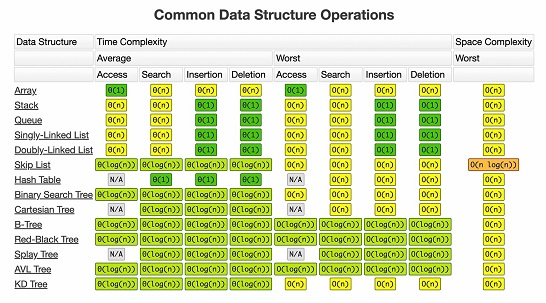

Source: https://www.bigocheatsheet.com/

### Arrays
* Static
* Dynamic

In [ ]:
array_random = list(np.random.randint(100, size=(5)))
print(array_random)

[46, 61, 25, 89, 47]


In [ ]:
array_sorted = array.array('i',(1, 2, 3, 4, 5))
print(array_sorted)

array('i', [1, 2, 3, 4, 5])


In [ ]:
array_repeated = array.array('i',(1, 2, 1, 4, 3))
print(array_repeated)

array('i', [1, 2, 1, 4, 3])


### Stack

A list with restriction, that any operation have to bee maked from the top

Is used for execution of function calls in a program

* Last In First Out - (LIFO)

In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

  
class Stack:
  def __init__(self, data):
    self.top = None
    self.size = 0

  def display(self):
    cur_node = self.top
    while cur_node != None:
      print(cur_node.data)
      cur_node = cur_node.next

  def push(self, data): # O(1)
    new_node = Node(data)
    if self.top is None:
      self.top = new_node
    else:
      new_node.next = self.top
      self.top = new_node
    self.size += 1

  def pop(self): # O(1)
    if self.top is None:
      return False
    else:
      temp_node = self.top
      self.top = self.top.next
      temp_node = None
      self.size -= 1
      return True
  

### Queue

A Queue is a linear structure which follows a particular order in which the operations are performed.

* First In First Out (FIFO)


In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class Queue:
  def __init__(self):
    self.first = None
    self.last = None
    self.size = 0

  def display(self):
    cur_node = self.first
    while cur_node != None:
      print(cur_node.data)
      cur_node = cur_node.next

  def enqueue(self, data): # O(1)
    new_node = Node(data)
    if self.first is None:
      self.first = new_node
      self.last = new_node
    else:
      self.last.next = new_node
      self.last = new_node
    self.size += 1

  def dequeue(self): # O(1)
    if self.size == 0:
      return False
    temp_node = self.first 
    if self.size == 1:
      self.first = None
      self.last = None
    else:      
      self.first = self.first.next
      temp_node.next = None
    self.size -= 1
    return temp_node.data


### Linked List

* **Head**: Start Node
* **Node**: Element with two sub-elements (data, next)
* **Tail**: Last Node

#### Worst Case
* Pop(n)
* Search by Index

* Singly
  * Head => Node => Node => Tail

In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.next = None

class LinkedList:
  def __init__(self):
    self.head = None
    self.tail = None
    self.size = 0    

  def append(self, data): # O(1)
    new_node = Node(data)
    if self.head is None:
      self.head = new_node
      self.tail = new_node
      self.size += 1
    else:
      self.tail.next = new_node
      self.tail = new_node
      self.size += 1

  def prepend(self,data): # O(1) 
    new_node = Node(data)
    if self.head is None:
      self.head = new_node
      self.tail = new_node
      self.size += 1
    else:            
      new_node.next = self.head
      self.head = new_node
      self.size += 1

  def pop(self): # O(n)
    if self.size == 0:
      return None
    cur_node = self.head
    if self.tail == self.head:
      self.head = None
      self.tail = None
    while cur_node.next != self.tail:
      cur_node = cur_node.next
    self.tail = cur_node
    self.tail.next = None
    self.size -= 1

  def pop_first(self): # O(1)
    if self.size == 0:
      return False
    cur_node = self.head
    self.head = self.head.next
    cur_node.next = None
    self.size -= 1
    if self.size == 0: 
      self.tail = None

  def get(self, index): # O(n)
    if (index-1) < 0 or (index) > self.size:
      return False
    cur_node = self.head
    for i in range(index-1):
      cur_node = cur_node.next
    return cur_node

  def set_data(self, index, data): # O(n)
    if self.size == 0:
      return False
    else:
      temp_node = self.get(index)
      if temp_node:
        temp_node.data = data
        return True
      return False

  def insert(self, index, data): # O(n)
    if (index-1) < 0 or (index-1) > self.size:
      return False
    if (index-1) == 0:
      return self.prepend(data)
    if (index-1) == self.size:
      return self.append(data)
    new_node = Node(data)
    temp_node = self.get(index)
    prev_node = self.get(index-1)
    new_node.next = temp_node
    prev_node.next = new_node
    self.size += 1
    return True

  def remove(self, index): # O(n)
    if (index-1) < 0 or index > self.size:
      return False
    if (index-1) == 0:
      return self.pop_first()
    if index == self.size:
      return self.pop()
    prev_node = self.get(index-1)
    temp_node = prev_node.next      
    prev_node.next = temp_node.next
    temp_node.next = None
    self.size -= 1
    return temp_node

  def reverse(self): # O(n)
    temp_node = self.head
    self.head = self.tail
    self.tail = temp_node
    after_node = None
    prev_node = None
    for _ in range(self.size):
      after_node = temp_node.next
      temp_node.next = prev_node
      prev_node = temp_node
      temp_node = after_node  

  def display(self): # O(n)
    if self.head is None:
      return False
    cur_node = self.head
    while cur_node != None:
      print(cur_node.data)
      cur_node = cur_node.next  
     



* Detect Loop in Linked List

In [ ]:
def detectLoop(self, head):
    slow_node = head
    fast_node = head
    while slow_node and fast_node and fast_node.next:
        slow_node = slow_node.next
        fast_node = fast_node.next.next
        if slow_node == fast_node:
            return True
    return False

* Doubly (under construction)
  * Head <=> Node <=> Node <=> Tail

### Tree

Is a group of nodes conected each other.
Each node can have multiples child.

    * Root Node
      * Node Child 1
        * Node Child 1.1
        * Node Child 1.2
        * Node Child 1.3
          * Node Child 1.1
          * Node Child 1.2
        * Node Child 1.4
      * Node Child 2
        * Node Child 2.1
      * Node Child 3
        * Node Child 3.1
          * Node Child 3.1.1
          * Node Child 3.1.2
        * Node Child 3.2

### Binary Tree

Is a tree structure where each node has at most two children (node).

* **root** The start node, dont have parent.
* **interior** The nodes have parents and childrens
* **leaf** The nodes without children


    * Root
      * Child left
        * Leaf left
        * Child right
          * Leaf left
      * Child right
        * Leaf left
        * Child right
          * Leaf left
          * Leaf right

#### Binary Search Tree

In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.left = None
    self.right = None


class BinarySearchTree:
  def __init__(self):
    self.root = None

  def _display(self, root):
    if root:
      print(root.data)
      if root.left:
        self._display(root.left)
      if root.right:
        self._display(root.right)

  def display(self):
    temp_node = self.root
    if temp_node:
      print(temp_node.data)
      if temp_node.left:
        self._display(temp_node.left)
      if temp_node.right:
        self._display(temp_node.right)

  def insert(self, data): # Θ(log n) and Worst case O(n)
    new_node = Node(data)
    if self.root is None:
      self.root = new_node
      return True
    cur_node = self.root
    while True:
      if new_node.data == cur_node.data:
        return False 
      if new_node.data < cur_node.data:
        if cur_node.left is None:
          cur_node.left = new_node
          return True
        else:
          cur_node = cur_node.left
      else:
        if cur_node.right is None:
          cur_node.right = new_node
          return True
        else:
          cur_node = cur_node.right

  def contains(self, data): # Θ(log n) and Worst case O(n)
    if self.root is None: return False
    temp_node = self.root
    while temp_node != None:
      if data < temp_node.data:
        temp_node = temp_node.left
      elif data > temp_node.data: 
        temp_node = temp_node.right
      else: # data == temp_node.data
        return True
    return False

  def min_of_node(self, cur_node):
    while cur_node.left != None:
      cur_node = cur_node.left
    return cur_node

* Test if is a Binary Search Tree:

In [ ]:
maxValue = 100000
minValue = 0

class Solution:
    
    def isBST(self, root):
        return self.isBSTutil(root, minValue, maxValue)
    
    
    def isBSTutil(self, root, minValue, maxValue):
        
        if root == None:
            return True
    
        if minValue > root.data:
            return False
    
        if maxValue < root.data:
            return False
     
        return self.isBSTutil(root.left, minValue, root.data-1 ) and self.isBSTutil(root.right, root.data+1, maxValue)
       
        

* With Recursion

In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.left = None
    self.right = None


class BinarySearchTree:
  def __init__(self):
    self.root = None 
  
  def append(self, data):
    if self.root is None:
      self.root = Node(data)
    else:      
      self._append(data, self.root)

  def _append(self, data, current_node):
    if data < current_node.data:
      if current_node.left is None:
        current_node.left = Node(data)
      else:
        self._append(data, current_node.left)
    elif data > current_node.data:
      if current_node.right is None:
        current_node.right = Node(data)
      else:
        self._append(data, current_node.right)

  def get(self, data):
    if self.root:
      element = self._get(data, self.root)
      if element:
        return True
      return False
    else:
      return None
    
  def _get(self, data, current_node):
    if data > current_node.data and current_node.right:
      return self._get(data, current_node.right)
    elif data < current_node.data and current_node.left:
      return self.get(data, current_node.left)
    if data == current_node.data:
      return True


### Hash Table || Hash Map

The ideia is use a ***hash function*** to convert a value to a smaller number to be used as a index in a ***hash table***

* Hash Function
  * hash a value to a small integer, using a math methods, that can be used as index:
  * Math Methods
    * Division
    * Folding
    * Mid Square
    * Multiplication
    * Mod

* Hash Table or Hash Map
  * An array that stores data to corresponding hash key

* Collision Handling
  * Close Addressing
    * Chaining
  * Open Addressing
    * Linear Probing
    * Quadratic Probing
    * Double Hashing


In [ ]:
data_dict = dict({1:'Bruno', 75:'Maria', 618:'Simone', 639:'Alberto', 787:'Jose'})
print(data_dict)

{1: 'Bruno', 75: 'Maria', 618: 'Simone', 639: 'Alberto', 787: 'Jose'}


* Nested


In [ ]:
class HashTable:
  def __init__(self, size):
    self.size = size
    self.data_map = [None] * self.size

  def __hash(self, key): 
    hash_key =  0
    for letter in key:
      hash_key = (hash_key + ord(letter) * 11) % self.size
    print(hash_key)
    return hash_key

  def set_item(self, key, data): # O(1)
    index = self.__hash(key)
    if self.data_map[index] == None:
      self.data_map[index] = []
    self.data_map[index].append([key, data])

  def get(self, key):
    index = self.__hash(key)
    if self.data_map[index] != None:
      for i in range(len(self.data_map[index])):
        if self.data_map[index][i][0] == key:
          return self.data_map[index][i][1]
    return False

  def display_keys(self):
    keys = []
    for i in range(self.size):
      if self.data_map[i] != None:
        for j in range(len(self.data_map[i])):
          keys.append(self.data_map[i][j][0])
    return keys

  def display(self):
    for i, data in enumerate(self.data_map):
      print(f'Index: {i} = {data}') 

### Graph

* Vertex or Node
* Edge or Connection
* Adjacency Matrix and List

In [ ]:
class Graph:
  def __init__(self):
    self.adjacency_list = {}
    
  def display(self):
    for vertex in self.adjacency_list:
      print(vertex,':',self.adjacency_list[vertex])

  def add_vertex(self, vertex):
    if vertex not in self.adjacency_list.keys():
      self.adjacency_list[vertex] = []
      return True
    return False

  def add_edge(self, vtx1, vtx2):
    if vtx1 in self.adjacency_list.keys() and vtx2 in self.adjacency_list.keys():
      self.adjacency_list[vtx1].append(vtx2)
      self.adjacency_list[vtx2].append(vtx1)
      return True
    return False

  def remove_edge(self, vtx1, vtx2):
    if vtx1 in self.adjacency_list.keys() and vtx2 in self.adjacency_list.keys():
      try:
        self.adjacency_list[vtx1].remove(vtx2)
        self.adjacency_list[vtx2].remove(vtx1)
      except ValueError:
        pass
      return True
    return False

  def remove_vertex(self, vtx):
    if vtx in self.adjacency_list.keys():
      for other_vtx in self.adjacency_list[vtx]:
        self.adjacency_list[other_vtx].remove(vtx)
      del self.adjacency_list[vtx]
      return True
    return False


---
# Algorithm

## Recursion

Its a function, that calls itself

* Pseudo Code
```
def open_box(box):
    if ball:
      return ball
    open_box(box)
```



* Call Stack

In [ ]:
def three():
  print(3)

def two():
  three()
  print(2)

def one():
  two()
  print(1)


* Factorial 

In [ ]:
def factorial(n):
  if n == 1:
    return 1
  return n * factorial(n-1)

## Search

* Linear Search
* Binary Search
* Jump Search
* Interpolation Search
* Exponential Search
* Ternary Search

#### Linear Search

* Time complexity: O(n)

In [ ]:
def linear_search(arr, find):
  for element in arr: # O(n)
    if find == element:
      print(element)
      return True

#### Binary Search

* Time complexity: O(log(n))

In [ ]:
def binary_search(arr, find):
  mid = int(len(arr)//2)
  if find == arr[mid]:
    return find
  else:
    if find < arr[mid]:
      arr = arr[:mid]
      binary_search(arr, find)
    else:
      arr = arr[mid:]
      binary_search(arr, find)
  return find

#### Binary Search - O(log n)

In [ ]:
def binary_search(array, search):
  array = sorted(array)
  mid = int(len(array)/2)
  if search == array[mid]:
    print(f'Hole In!!! Your search: {search} is in the array[{mid}]')
  elif search < array[mid] and search >= array[0]:
    array = array[:mid]
    print(array)
    return binary_search(array, search)   
  elif search > array[mid] and search <= array[len(array)-1]:
    array = array[mid:]
    print(array)
    return binary_search(array, search)
  else:
    print(f'Your search is out of list.')

#### Jump Search

* Time complexity: O(√ n)

#### Interpolation Search

* Time complexity: O(n)

## Sorting

* Selection Sort
* Bubble Sort
* Insertion Sort
* Merge Sort
* Heap Sort
* Quick Sort
* Radix Sort
* Counting Sort
* Bucket Sort
* ShellSort
* Comb Sort
* Pigeonhole Sort
* Cycle Sort

#### Time Complexity

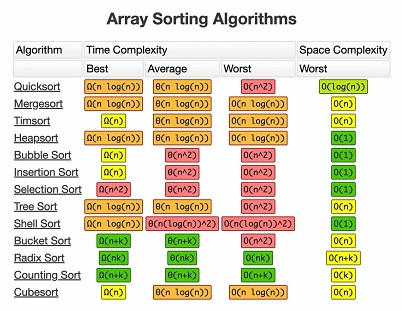

Source: https://www.bigocheatsheet.com/


#### Space Complexity

* In-Place 

* External

#### Stability

Preserve the original sort of the same values.

* Algorthm Stable
  * Bubble Sort
  * Insertion Sort
  * Merge Sorte
  * Count Sort

* Algorthm Unstable
  * Quick Sort
  * Heap Sort

#### Internal sort Vs. External Sort

* Internal: All records in Main Memory / RAM

* External: Records are on Disk

#### Recursive or Non-Recursive

* Recursive:
  * Quick Sort
  * Merge Sort

* Non-Recursive
  * Insertion Sort
  * Selection Sort



#### Selection Sort

* Time complexity: O(n²)

* Space complexity: O(1)

* Swap complexity: O(n)


In [ ]:
def selection_sort(arr):
  for i in range(len(arr)): # O(n)
    low_ref = i
    for j in range(i+1, len(arr)): # O(n)
      if arr[low_ref] > arr[j]:
        low_ref = j
    arr[i], arr[low_ref] = arr[low_ref], arr[i]  
  return arr


def selection_sort2(array):
  for i in range(len(array) - 1): # O(n)
    min_index = i
    for j in range(i + 1, len(array)): # O(n)     
      if array[min_index] > array[j]:
        min_index = j
    if i != min_index:
      array[i], array[min_index] = array[min_index], array[i]
  return array

#### Bubble Sort

* Time complexity: O(n²)
  * The worst-case occurs when an array is reverse sorted.

* Space complexity: O(1)

* Swap complexity: O(n)

* Stable: Yes

In [ ]:
def bubble_sort_1(arr): # O(n²)
  for i in range(len(arr)): # O(n)
    for j in range(0, len(arr)-i-1): # O(n)
      if arr[j] > arr[j + 1]:
        arr[j], arr[j + 1] = arr[j + 1], arr[j]
  return arr

In [ ]:
  def bubble_sort_2(array): # O(n²)
  for i in range(len(array) - 1, 0, -1): # O(n)
    for j in range(i): # O(n)
      if array[j] > array[j+1]:
        array[j], array[j+1] = array[j+1], array[j]
  return array

#### Insertion Sort

* Time complexity: O(n²)
  * The worst-case occurs when an array is reverse sorted.
* Space complexity: O(1)

* Sorting In-place: Yes

* Stable: Yes

In [ ]:
def insertion_sort(arr):
  for i in range(1, len(arr)): # O(n)
    cur_key = arr[i]
    j = i - 1
    while j >= 0 and arr[j] > cur_key: # O(n)
      arr[j + 1] = arr[j] 
      j -= 1
    arr[j + 1] = cur_key
  return arr


def insertion_sort2(array):
  for i in range(1, len(array)):
    temp = array[i]
    j = i - 1
    while temp < array[j] and j >= 0:
      array[j], array[j+1] = array[j+1], array[j]
      j -= 1 
  return array

### Divide and Conquer
  1. **Divide**: Dividing the problem into smaller sub-problems.
  2. **Conquer**: Solve sub-problems by calling recursively until solved.
  3. **Combine**: Combine the sub-problems to get the final solution of the whole problem.

Types of Divide and Conquer Algorithm:

  * QuickSort
  * Merge Sort


#### Merge Sort

* Time Complexity: O(n log n) for 3 cases (worst, average and best)
* Space Complexity: O(n)
* Stable: Yes

In [ ]:
# O(log n)
def split_sort(array):
  if len(array) == 1:
    return array
  else:
    mid = int(len(array)/2)
    left_array = sorted(array[:mid])
    right_array = sorted(array[mid:])
    return merge_sort(left_array, right_array)

  
# O(n)
def merge_sort(left_array, right_array):
  array = []
  left_index = 0
  right_index = 0
  # Iterate left and right arrays, to sorte the values.
  while left_index < len(left_array) and right_index < len(right_array):
    # If left array less than right add left value.
    if left_array[left_index] < right_array[right_index]:
      array += [left_array[left_index]]
      left_index += 1
    # If right array less than left add left value.
    elif left_array[left_index] > right_array[right_index]:
      array += [right_array[right_index]]
      right_index += 1
    # If boths values equqal, add boths values.
    else:
      array += [left_array[left_index]]
      array += [right_array[right_index]]
      left_index += 1
      right_index += 1
  # At end, add the las value remainder not compared
  if left_index < len(left_array):
    array += [left_array[left_index]]
  elif right_index < len(right_array): 
    array += [right_array[right_index]]
  return array
    

In [ ]:
def merge(left, right):
  combined = []
  i = 0
  j = 0
  while i < len(left) and j < len(right): # Time: O(n)
    if left[i] < right[j]:
      combined.append(left[i])
      i += 1
    else:
      combined.append(right[j])
      j += 1
  while i < len(left): # Time: O(n)
    combined.append(left[i])
    i += 1
  while j < len(right): # Time: O(n)
    combined.append(right[j])
    j += 1
  return combined

def merge_sort2(array): # Space: O(1) => O(n) && Time: O(log n)
  if len(array) == 1:
    return array
  mid = int(len(array)//2)
  left = array[:mid]
  right = array[mid:]
  return merge(merge_sort2(left), merge_sort2(right))

#### Quick Sort

* Instable
* Inplace

* The worst case occurs when the partition process always picks greatest or smallest element as pivot

* Quick Sort #1

In [ ]:
def partition(array, left, right):
  pivot = array[right]
  i = left - 1
  for j in range(left, right): # O(n) or Worst Case O(n²)
    if array[j] <= pivot:
      i += 1
      array[i], array[j] = array[j], array[i]
  array[i + 1], array[right] = array[right], array[i + 1]
  return i + 1


def quicksort(array, left, right): # O(log n)
  if left < right:
    index_pivot = partition(array, left, right)
    quicksort(array, left, index_pivot - 1)
    quicksort(array, index_pivot + 1, right)
  return array

* Quick Sort #2

In [ ]:
def swap(array, index_one, index_two):
  temp = array[index_one]
  array[index_one] = array[index_two]
  array[index_two] = temp

def pivot(array, pivot_index, end_index):
  
  swap_index = pivot_index

  for i in range(pivot_index + 1, end_index + 1): # O(n) or *Worst Case O(n²) 
    if array[i] < array[pivot_index]:
      swap_index += 1
      swap(array, swap_index, i)
  swap(array, pivot_index, swap_index)
  return swap_index

def quicksort_helper(array, left, right): # O(log n)
  if left < right:
    pivot_index = pivot(array, left, right)
    quicksort_helper(array, left, pivot_index-1)
    quicksort_helper(array, pivot_index+1, right)
  return array

def quicksort(array):
  return quicksort_helper(array, 0, len(array) - 1)

* QuickSort (simple way)

In [ ]:
def quicksort_simple(array):
  length = len(array)  
  if length <= 1: # O(1)
    return array
  else: # O(1)
    pivot = array.pop()

  part_left = []
  part_right = []

  for item in array: # O(n)
    if item < pivot: # O(1)
      part_left.append(item)
    else: # O(1)
      part_right.append(item)
  return quicksort_simple(part_left) + [pivot] + quicksort_simple(part_right) # O(log n) + O(1) + O(log n) 


## Breadth-first and Depth-first 
Is a tecnich to traverse or search a graph.

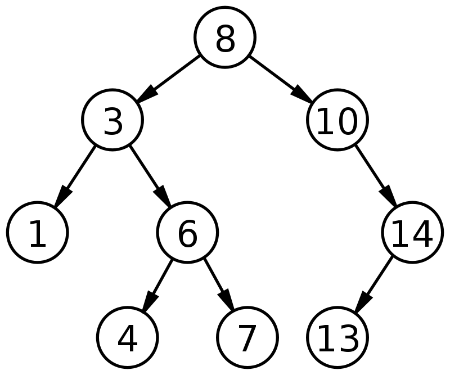


### Breadth-first:
  * Data Structure:
    * Queue (FIFO)
  * Traversal:
    * Level-order:`<level_1><level_2><level_3>`
      * Output: `[8, 3, 10, 1, 6, 14, 4, 7, 13]`
    

In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.left = None
    self.right = None


class BinarySearchTree:
  def __init__(self):
    self.root = None

  def _display(self, root):
    if root:
      print(root.data)
      if root.left:
        self._display(root.left)
      if root.right:
        self._display(root.right)

  def display(self):
    temp_node = self.root
    if temp_node:
      print(temp_node.data)
      if temp_node.left:
        self._display(temp_node.left)
      if temp_node.right:
        self._display(temp_node.right)

  def insert(self, data):
    new_node = Node(data)
    if self.root is None:
      self.root = new_node
      return True
    cur_node = self.root
    while True:
      if new_node.data == cur_node.data:
        return False 
      if new_node.data < cur_node.data:
        if cur_node.left is None:
          cur_node.left = new_node
          return True
        else:
          cur_node = cur_node.left
      else:
        if cur_node.right is None:
          cur_node.right = new_node
          return True
        else:
          cur_node = cur_node.right

  def breadth_first(self):
    current_node = self.root
    queue = []
    result = []
    queue.append(current_node)
    while len(queue) > 0:
      current_node = queue.pop(0)
      result.append(current_node.data)
      if current_node.left != None:
       queue.append(current_node.left) 
      if current_node.right != None:
       queue.append(current_node.right)
    return result

### Depth-first:
  * Data Structure:
    * Stack (LIFO)
  * Traversal:
    * Preorder `<root><left><right>`
      * Output: `[8, 3, 1, 6, 4, 7, 10, 14, 13]`
    * Inorder `<left><root><right>`
      * Output: `[1, 3, 4, 6, 7, 8, 10, 13, 14]`
    * Postorder `<left><right><root>`
      * Output: `[1, 4, 7, 6, 3, 13, 14, 10, 8]`


In [ ]:
class Node:
  def __init__(self, data):
    self.data = data
    self.left = None
    self.right = None


class BinarySearchTree:
  def __init__(self):
    self.root = None

  def insert(self, data):
    new_node = Node(data)
    if self.root is None:
      self.root = new_node
      return True
    cur_node = self.root
    while True:
      if new_node.data == cur_node.data:
        return False 
      if new_node.data < cur_node.data:
        if cur_node.left is None:
          cur_node.left = new_node
          return True
        else:
          cur_node = cur_node.left
      else:
        if cur_node.right is None:
          cur_node.right = new_node
          return True
        else:
          cur_node = cur_node.right

  def preorder(self):
    result = []    
    def traverse(current_node):
      result.append(current_node.data)
      if current_node.left != None:
        traverse(current_node.left)
      if current_node.right != None:
        traverse(current_node.right)
    traverse(self.root)
    return result
    
  def inorder(self):
    result = []
    def traverse(current_node):
      if current_node.left != None:
        traverse(current_node.left)
      result.append(current_node.data)
      if current_node.right != None:
        traverse(current_node.right)
    traverse(self.root)
    return result

  def postorder(self):
    result = []
    def traverse(current_node):
      if current_node.left != None:
        traverse(current_node.left)
      if current_node.right != None:
        traverse(current_node.right)
      result.append(current_node.data)
    traverse(self.root)
    return result



---
# Dynamic Programming



1.   Recursion
2.   Memoization (Top Down) 
3.   Tabulation (Bottom Up)


### Fibonnaci Sample 

`[1, 1, 2, 3, 5, 8, ...]`

* 1+1 = 2
* 2+1 = 3
* 3+2 = 5
* 5+3 = 8
* 8+5 = ...



#### Fibonnacci: Recursion Solution

In [ ]:
def fib_recursion(n):
  if n == 1 or n == 2:
    return 1
  return fib_recursion(n-1) + fib_recursion(n-2)

#### Fibonnacci: Memoized Solution (Top Down) 

In [ ]:
def fib_memoization(n, memoize):
  if memoize[n]:    
    print(f'Memoize: Fib({n}) = {memoize[n]}')
    return memoize[n]
  if n == 1 or n == 2:
    result = 1
    print(f'Fib(1) or Fib(2): {result}')
  else:
    print(f'Else enter: Fib({n})')
    result = fib_memoization(n - 1, memoize) + fib_memoization(n - 2, memoize)
    print(f'Else result: Fib({n}) = {result}')
    memoize[n] = result
  return result

#### Fibonnacci: Tabulation Solution (Bottom Up) 

In [ ]:
def fib_tabulation(n):
  fib = [0] * (n+1) # O(1) 
  fib[1] = 1 # O(1) 
  for i in range(2, n + 1): # for, range => O(n) + O(1)
    fib[i] = fib[i - 1] + fib[i - 2]
  return fib[n] # O(1) 
